In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import glob
import os
import seaborn as sns
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import warnings
warnings.filterwarnings("ignore")

## 18 ~ 20년도 미세먼지 데이터 가공하기

get_jeju 함수
- 제주도 데이터만 가져오기
- 에어코리아 사이트에 ※ 거주지역의 대표 대기질은 "도시대기" 측정자료를 참고하시기 바랍니다.
- 라는 문구가 있음 "도시대기"만 보자

In [2]:
def get_jeju(df):
    data = df.copy()
    data["시도"] = data["지역"].apply(lambda x : x.split(" ")[0])
    return data[data["시도"] == "제주"].reset_index(drop=True).drop("시도",axis=1)

In [3]:
input_file = r'C:\Users\김유빈\빅콘\사용한 데이터\2018-2020 공기데이터' 


airdata_all = []
airdata_file_list = glob.glob(os.path.join(input_file,"*"))
for file in airdata_file_list:
    data = pd.read_csv(file)
    airdata_all.append(get_jeju(data))
airdata_df = pd.concat(airdata_all,axis=0).reset_index(drop=True)

In [57]:
airdata_df[["측정소코드","망","측정소명"]].value_counts()

측정소코드   망       측정소명
339111  도시대기    이도동     21960
339112  도시대기    연동      21960
339121  도시대기    동홍동     21960
339122  도시대기    성산읍     21960
339312  국가배경농도  고산리     21960
339131  도시대기    대정읍     18661
339211  도로변대기   노형로     10248
339123  도시대기    남원읍      9000
339113  도시대기    조천읍       744
339114  도시대기    한림읍       744
dtype: int64

망 column 채워주기

In [5]:
def code(value):
    if int(value) == 33912:
        return "국가배경농도"
    elif int(value) == 18661:
        return "도로변대기"
    else:
        return "도시대기"

airdata_df["망"] = airdata_df["측정소코드"].apply(lambda x : code(x))

일시별로 groupby 해주기

In [6]:
airdata_df["측정일시"] = airdata_df["측정일시"].astype(str).apply(lambda x : x[:-2])

In [7]:
column = ["SO2","CO","O3","NO2","PM10","PM25"]
aggregation = {i:"mean" for i in column}

airdata = airdata_df.groupby(["측정일시","측정소코드","지역","주소","망"]).agg(aggregation).reset_index()

In [8]:
#airdata.to_csv("2018~2020 미세먼지 데이터.csv",encoding="utf-8-sig")
airdata

,측정일시,측정소코드,지역,주소,망,SO2,CO,O3,NO2,PM10,PM25
0,20180101,339111,제주 제주,제주 제주시 이도2동 1176-1(제주시청),도시대기,0.002958,0.345833,0.028792,0.014000,50.791667,19.541667
1,20180101,339112,제주 제주,제주 제주시 연동 322-1 번지 제주특별자치도청 제2청사,도시대기,0.003000,0.254167,0.031292,0.013750,49.541667,27.333333
2,20180101,339121,제주 서귀포,제주 서귀포시 동홍동 453-1(서귀포소방서),도시대기,0.000913,0.304348,0.028435,0.008739,49.130435,21.227273
3,20180101,339122,제주 서귀포,제주 서귀포시 성산읍 일주동로 4120번길 7,도시대기,0.001000,0.320833,0.036542,0.002625,44.583333,18.916667
4,20180101,339312,제주 제주,제주 제주시 한경면 고산리,도시대기,NaN,0.316667,0.035917,0.000158,79.428571,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7117,20201231,339122,제주 서귀포시,제주 서귀포시 성산읍 일주동로 4120번길 7,도시대기,0.000958,0.258333,0.035542,0.003333,5.250000,5.217391
7118,20201231,339123,제주 서귀포시,제주특별자치도 서귀포시 남원읍 남한로 67,도시대기,0.001042,0.266667,0.034042,0.003042,11.541667,NaN
7119,20201231,339131,제주 서귀포시,제주특별자치도 서귀포시 대정읍 동일하모로149번길 21-8,도시대기,0.001000,0.466667,0.033750,0.003917,12.043478,9.583333
7120,20201231,339211,제주 제주시,제주특별자치도 제주시 1100로 3348,도시대기,0.001000,0.179167,0.030583,0.008875,13.500000,3.250000


### 공공데이터 포털 API 이용하기
- 인코딩키 : %2FVg1J8MmKzuTqcg1RFWfc3U7B6OLQGu28VZvd9EkkL7l0%2BIYsdB5Oe0eTm85cUMsNyjZVrFo7GC8fKNxLqKRDA%3D%3D
- 디코딩키 : /Vg1J8MmKzuTqcg1RFWfc3U7B6OLQGu28VZvd9EkkL7l0+IYsdB5Oe0eTm85cUMsNyjZVrFo7GC8fKNxLqKRDA==

측정일	msurDt	20	필수	2020-10-01	평균자료 조회일
측정소명	msrstnName	10	필수	종로	시군구
아황산가스 평균농도	so2Value	10	필수	0.004	아황산가스 평균농도(단위:ppm)
일산화탄소 평균농도	coValue	10	필수	0.4	일산화탄소 평균농도(단위:ppm)
오존 평균농도	o3Value	10	필수	0.005	오존 평균농도(단위:ppm)
이산화질소 평균농도	no2Value	10	필수	0.027	이산화질소 평균농도(단위:ppm)
미세먼지 평균농도	pm10Value	10	필수	22	미세먼지 평균농도(단위:ug/m3)
초미세먼지 평균농도	pm25Value	10	필수	22	초미세먼지 평균농도(단위:ug/m3)

339111  도시대기    이도동     21960
339112  도시대기    연동      21960
339121  도시대기    동홍동     21960
339122  도시대기    성산읍     21960
339312  국가배경농도  고산리     21960
339131  도시대기    대정읍     18661
339211  도로변대기   노형로     10248
339123  도시대기    남원읍      9000
339113  도시대기    조천읍       744
339114  도시대기    한림읍       744

In [268]:
import urllib
from urllib.parse import urlencode, quote_plus
import requests
from bs4 import BeautifulSoup
import json
from pandas import json_normalize

In [271]:
ServiceKey = "/Vg1J8MmKzuTqcg1RFWfc3U7B6OLQGu28VZvd9EkkL7l0+IYsdB5Oe0eTm85cUMsNyjZVrFo7GC8fKNxLqKRDA=="
open_url = 'http://apis.data.go.kr/B552584/ArpltnStatsSvc/getMsrstnAcctoRDyrg'

def get_미세먼지(측정소명):
    queryParams = '?' + urlencode({quote_plus('serviceKey') : ServiceKey,
                                   quote_plus('returnType') : 'json',
                                   quote_plus('numOfRows') : '10',
                                   quote_plus('pageNo') : '1',
                                   #quote_plus('inqBginDt') : 시작날짜,
                                   #quote_plus('inqEndDt') : 종료날짜,                                  
                                   quote_plus('inqBginDt') : '20210423',
                                   quote_plus('inqEndDt') : '20210425',
                                   quote_plus('msrstnName') : 측정소명 })
    open_url_get = open_url + queryParams
    res = requests.get(open_url_get)
    info = json.loads(res.content)
    res_df = json_normalize(info["response"]["body"]["items"])
    return res_df

,msurDt,so2Value,coValue,msrstnName,pm10Value,no2Value,o3Value,pm25Value
0,2021-04-23,.0028,.4,대연동,31,.01,.05,11
1,2021-04-23,.003,.2,연동,49,.0072,.056,16
2,2021-04-25,.0025,.4,대연동,27,.0102,.043,11
3,2021-04-25,.0022,.2,연동,38,.0102,.049,15


In [127]:
이도동 = get_미세먼지("20210101","20210831","이도동")
연동 = get_미세먼지("20210101","20210831","연동")
연동 = 연동[연동["msrstnName"] == "연동"].reset_index(drop=True)
# 대연동이 함께 검색되어서 연동만 파싱했음
동홍동 = get_미세먼지("20210101","20210831","동홍동")
성산읍 = get_미세먼지("20210101","20210831","성산읍")
고산리 = get_미세먼지("20210101","20210831","고산리")
대정읍 = get_미세먼지("20210101","20210831","대정읍")
노형로 = get_미세먼지("20210101","20210831","노형로")
남원읍 = get_미세먼지("20210101","20210831","남원읍")
조천읍 = get_미세먼지("20210101","20210831","조천읍")
한림읍 = get_미세먼지("20210101","20210831","한림읍")

In [157]:
import pandas as pd
result_lst = [이도동,연동,동홍동,성산읍,고산리,대정읍,노형로,남원읍,조천읍,한림읍]
result_df = pd.concat(result_lst,axis=0)
result_df.columns = ["측정일시","SO2","CO","측정소명","PM10","NO2","O3","PM25"]

In [159]:
result_df.to_csv("2021년 미세먼지 데이터.csv",encoding="utf-8-sig",index=False)

### 18 ~ 21년 데이터 합치기
- 18~20년도와 21년도 데이터 기준이 다르다
- 일자 / 측정소명 / 주소 / 대기오염데이터 순으로 나열하자
- 도시대기 데이터만 이용하기

연동     180
성산읍    180
대정읍    180
한림읍    180
조천읍    180
동홍동    180
남원읍    180
노형로    180
이도동    180
고산리    179
Name: 측정소명, dtype: int64

In [366]:
미세먼지_21 = pd.read_csv("2021년 미세먼지 데이터.csv")
미세먼지_1820 = pd.read_csv("2018~2020 미세먼지 데이터.csv")

# 도로변대기인 노형로,고산리 제외하기
#미세먼지_21 = 미세먼지_21[(미세먼지_21["측정소명"] != "노형로") & (미세먼지_21["측정소명"] != "고산리")]

339111  도시대기    이도동     제주 제주시 이도2동 1176-1(제주시청)
339112  도시대기    연동      제주 제주시 연동 322-1 번지 제주특별자치도청 제2청사
339121  도시대기    동홍동    제주 서귀포시 동홍동 453-1(서귀포소방서)
339122  도시대기    성산읍     제주 서귀포시 성산읍 일주동로 4120번길 7
339312  국가배경농도  고산리   
339131  도시대기    대정읍   제주 서귀포시 대정읍 동일하모로149번길 21-8
339211  도로변대기   노형로     10248
339123  도시대기    남원읍    제주특별자치도 서귀포시 남원읍 남한로 67
339113  도시대기    조천읍    제주특별자치도 제주시 조천읍 조천18길 11-1 
339114  도시대기    한림읍     제주특별자치도 제주시 한림읍 한림중앙로 71-9 

In [367]:
미세먼지_1820.head(3)

,측정일시,측정소코드,지역,주소,망,SO2,CO,O3,NO2,PM10,PM25
0,20180101,339111,제주 제주,제주 제주시 이도2동 1176-1(제주시청),도시대기,0.002958,0.345833,0.028792,0.014000,50.791667,19.541667
1,20180101,339112,제주 제주,제주 제주시 연동 322-1 번지 제주특별자치도청 제2청사,도시대기,0.003000,0.254167,0.031292,0.013750,49.541667,27.333333
2,20180101,339121,제주 서귀포,제주 서귀포시 동홍동 453-1(서귀포소방서),도시대기,0.000913,0.304348,0.028435,0.008739,49.130435,21.227273


- get_주소 함수 : 측정소명을 입력하면 주소 반환
- get_측정소명 함수 : 측정소코드를 입력하면 측정소명 반환

In [368]:
def get_주소(측정소명):
    if 측정소명 == "이도동":
        return "제주 제주시 이도2동 1176-1(제주시청)"
    elif 측정소명 == "연동":
        return "제주 제주시 연동 322-1 번지 제주특별자치도청 제2청사"
    elif 측정소명 == "동홍동":
        return "제주 서귀포시 동홍동 453-1(서귀포소방서)"
    elif 측정소명 == "성산읍":
        return "제주 서귀포시 성산읍 일주동로 4120번길 7"
    elif 측정소명 == "대정읍":
        return "제주 서귀포시 대정읍 동일하모로149번길 21-8"
    elif 측정소명 == "남원읍":
        return "제주특별자치도 서귀포시 남원읍 남한로 67"
    elif 측정소명 == "조천읍":
        return "제주특별자치도 제주시 조천읍 조천18길 11-1"
    elif 측정소명 == "한림읍":
        return "제주특별자치도 제주시 한림읍 한림중앙로 71-9"
    
def get_측정소명(측정소코드):
    value = 측정소코드
    if int(value) == 339111:
        return "이도동"
    elif int(value) == 339112:
        return "연동"
    elif int(value) == 339121:
        return "동홍동"   
    elif int(value) == 339122:
        return "성산읍"   
    elif int(value) == 339131:
        return "대정읍"   
    elif int(value) == 339123:
        return "남원읍"   
    elif int(value) == 339113:
        return "조천읍"
    elif int(value) == 339114:
        return "한림읍"

18~20년도 미세먼지 데이터와 21년도 미세먼지 데이터 열 맞춰주기
- 1820의 도시대기가 아닌 것들 제외해주기
- 21의 도시대기가 아닌 것들 제외해주기

In [369]:
미세먼지_1820["측정소명"] = 미세먼지_1820["측정소코드"].apply(lambda x : get_측정소명(x))
미세먼지_1820.drop(["측정소코드","지역","망"],axis=1,inplace=True)
미세먼지_1820["측정일시"] = pd.to_datetime(미세먼지_1820["측정일시"],format="%Y%m%d")

미세먼지_1820 = 미세먼지_1820[미세먼지_1820["측정소명"].notnull()]
# 도시대기 아닌 것 제외하기

In [370]:
미세먼지_21["주소"] = 미세먼지_21["측정소명"].apply(lambda x : get_주소(x))
미세먼지_21["측정일시"] = pd.to_datetime(미세먼지_21["측정일시"],format="%Y-%m-%d")

미세먼지_21 = 미세먼지_21[미세먼지_21["주소"].notnull()]
# 도시대기 아닌 것 제외하기

In [371]:
미세먼지_1820 = 미세먼지_1820[['측정일시','측정소명','주소','SO2', 'CO', 'PM10', 'NO2', 'O3', 'PM25',]]
미세먼지_21 = 미세먼지_21[['측정일시','측정소명','주소','SO2', 'CO', 'PM10', 'NO2', 'O3', 'PM25',]]

미세먼지 : 18~21년도 미세먼지 데이터 합친 것

In [372]:
미세먼지 = pd.concat([미세먼지_1820,미세먼지_21],axis=0,ignore_index=True)

### 결측치 처리하기
- 결측치 어떻게 처리할지 고민하기
- 전날과 다음날의 평균으로 먼저 결측치 채워주기
- 연도별로 관측소가 달라진다

In [373]:
미세먼지 = 미세먼지.rename(columns={"측정일시":"일자"})

미세먼지["일자"] = pd.to_datetime(미세먼지["일자"],format="%Y-%m-%d")
미세먼지["년"] = 미세먼지["일자"].apply(lambda x : x.year)
미세먼지["월"] = 미세먼지["일자"].apply(lambda x : x.month)
미세먼지["일"] = 미세먼지["일자"].apply(lambda x : x.day)

In [374]:
def get_미세먼지_결측치(data):
    측정소명 = ['동홍동', '이도동', '성산읍', '연동', '대정읍', '남원읍', '한림읍', '조천읍']
    측정목록 = ["SO2","CO","PM10","NO2","O3","PM25"]
    결과리스트 = []
    
    for 측정소 in 측정소명:
        df = data[data["측정소명"] == 측정소].reset_index(drop=True)
        for 항목 in 측정목록:
            for idx,row in df[df[항목].isnull()].iterrows():
                if df.loc[idx+1,항목] != np.nan:
                    if df.loc[idx-1,항목] != np.nan:
                        df.loc[idx,항목] = ( df.loc[idx+1,항목]+df.loc[idx-1,항목] ) / 2
        결과리스트.append(df)
    return pd.concat(결과리스트,axis=0,ignore_index = True)

### 연도마다 측정소가 다름
- 특정년도 특정 측정소에 데이터 개수가 365개가 아닌 경우가 있음
- 2018년도에는 연동 / 이도동 / 성산읍 / 동홍동 ( 대정읍 빼주기 )
- 2019년도에는 연동 / 이도동 / 성산읍 / 동홍동 / 대정읍 ( 남원읍 빼주기 )
- 2020년도에는 연동 / 이도동 / 성산읍 / 동홍동 / 대정읍 / 남원읍 ( 조천읍,한림읍 빼주기 )
- 2021년도에는 연동 / 이도동 / 성산읍 / 동홍동 / 대정읍 / 남원읍 / 조천읍 만 365개씩 존재

In [375]:
미세먼지[미세먼지["년"] == 2018]["측정소명"].value_counts()
미세먼지[미세먼지["년"] == 2019]["측정소명"].value_counts()
미세먼지[미세먼지["년"] == 2020]["측정소명"].value_counts()
미세먼지[미세먼지["년"] == 2021]["측정소명"].value_counts()

대정읍    242
성산읍    242
이도동    242
동홍동    242
연동     242
남원읍    242
한림읍    242
조천읍    242
Name: 측정소명, dtype: int64

In [381]:
미세먼지_18 = 미세먼지[(미세먼지["년"] == 2018) & (미세먼지["측정소명"] != "대정읍")]
미세먼지_19 = 미세먼지[(미세먼지["년"] == 2019) & (미세먼지["측정소명"] != "남원읍")]
미세먼지_20 =  미세먼지[(미세먼지["년"] == 2020)]
미세먼지_20 = 미세먼지_20[(미세먼지_20["측정소명"] != "조천읍") & (미세먼지_20["측정소명"] != "한림읍")]
미세먼지_21 = 미세먼지[미세먼지["년"] == 2021]

In [382]:
미세먼지_측정소제거 = pd.concat([미세먼지_18,미세먼지_19,미세먼지_20,미세먼지_21],axis=0,ignore_index=True)

미세먼지_결측치 : 전날 다음날 평균으로 결측치 채우기

In [383]:
미세먼지_결측치대체 = get_미세먼지_결측치(미세먼지_측정소제거)

In [255]:
미세먼지_결측치.sort_values(["년","월"])

,일자,측정소명,주소,SO2,CO,PM10,NO2,O3,PM25,년,월,일
0,2018-01-01,동홍동,제주 서귀포시 동홍동 453-1(서귀포소방서),0.000913,0.304348,49.130435,0.008739,0.028435,21.227273,2018,1,1
1,2018-01-02,동홍동,제주 서귀포시 동홍동 453-1(서귀포소방서),0.001250,0.329167,46.166667,0.013708,0.025542,23.083333,2018,1,2
2,2018-01-03,동홍동,제주 서귀포시 동홍동 453-1(서귀포소방서),0.000917,0.316667,52.916667,0.012083,0.028708,25.041667,2018,1,3
3,2018-01-04,동홍동,제주 서귀포시 동홍동 453-1(서귀포소방서),0.000875,0.233333,24.000000,0.007458,0.030333,11.263158,2018,1,4
4,2018-01-05,동홍동,제주 서귀포시 동홍동 453-1(서귀포소방서),0.000750,0.250000,19.157895,0.010208,0.023583,11.916667,2018,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
7412,2021-08-27,조천읍,제주특별자치도 제주시 조천읍 조천18길 11-1,0.003000,0.200000,9.000000,0.005800,0.014000,5.000000,2021,8,27
7413,2021-08-28,조천읍,제주특별자치도 제주시 조천읍 조천18길 11-1,0.003000,0.200000,7.000000,0.006200,0.017000,2.000000,2021,8,28
7414,2021-08-29,조천읍,제주특별자치도 제주시 조천읍 조천18길 11-1,0.003100,0.200000,6.000000,0.005700,0.017000,3.000000,2021,8,29
7415,2021-08-30,조천읍,제주특별자치도 제주시 조천읍 조천18길 11-1,0.003000,0.200000,7.000000,0.006900,0.020000,4.000000,2021,8,30


In [178]:
미세먼지_결측치대체.to_csv("2018~2021 미세먼지 데이터 전처리완료.csv",index=False,encoding="utf-8-sig")

## 선형 회귀 모델을 통한 결측치 대체

전처리 방법으로 더 가공해보기
- 미세먼지_결측치대체 : 앞뒤 평균으로 결측치 조금이라도 대체한 것
- 미세먼지_결측치제거 : 결측치가 하나라도 있는 행 다 뺀 것
- SO2 : 다른 열 말고 SO2만 결측치 있는 행 + 결측치가 없는 행

In [390]:
미세먼지_결측치대체 = pd.read_csv("2018~2021 미세먼지 데이터 전처리완료.csv")

In [391]:
from sklearn import linear_model
from datetime import datetime, timedelta
목록 = ["SO2","CO","PM10","NO2","O3","PM25"]

# 결측치가 1개인 것들
- 해당 항목 제외하고 선형 회귀로 예측하기

SO2 예측하기 위한 모델 생성하기

In [392]:
미세먼지_결측치제거 = 미세먼지_결측치대체.dropna(axis=0,how="any")

SO2 = 미세먼지_결측치대체[((미세먼지_결측치대체["PM10"].notnull()) & (미세먼지_결측치대체["NO2"].notnull()) & 
           (미세먼지_결측치대체["O3"].notnull()) & (미세먼지_결측치대체["PM25"].notnull()) &
                     (미세먼지_결측치대체["CO"].notnull()))]
# SO2 : SO2만 null인 데이터

X = 미세먼지_결측치제거[["CO","PM10","NO2","O3","PM25"]]
y = 미세먼지_결측치제거["SO2"]

In [393]:
reg = linear_model.LinearRegression()
reg.fit(X,y)
y_pred = reg.predict(SO2[["CO","PM10","NO2","O3","PM25"]])

SO2_pred = pd.DataFrame(SO2[['일자','측정소명','SO2']].fillna(pd.Series(y_pred.flatten())))
SO2['SO2'].fillna(pd.Series(y_pred.flatten()), inplace=True)

CO 예측하기 위한 모델 생성하기

In [394]:
CO = 미세먼지_결측치대체[((미세먼지_결측치대체["PM10"].notnull()) & (미세먼지_결측치대체["NO2"].notnull()) & 
           (미세먼지_결측치대체["O3"].notnull()) & (미세먼지_결측치대체["PM25"].notnull()) &
                     (미세먼지_결측치대체["SO2"].notnull()))]

X = 미세먼지_결측치제거[["SO2","PM10","NO2","O3","PM25"]]
y = 미세먼지_결측치제거["CO"]

In [395]:
reg = linear_model.LinearRegression() ; reg.fit(X,y)
y_pred = reg.predict(CO[["SO2","PM10","NO2","O3","PM25"]])

CO_pred = pd.DataFrame(CO[['일자','측정소명','CO']].fillna(pd.Series(y_pred.flatten())))
CO['CO'].fillna(pd.Series(y_pred.flatten()), inplace=True)

PM10 예측하기 위한 모델 생성하기

In [396]:
PM10 = 미세먼지_결측치대체[((미세먼지_결측치대체["CO"].notnull()) & (미세먼지_결측치대체["NO2"].notnull()) & 
           (미세먼지_결측치대체["O3"].notnull()) & (미세먼지_결측치대체["PM25"].notnull()) &
                     (미세먼지_결측치대체["SO2"].notnull()))]

X = 미세먼지_결측치제거[["SO2","CO","NO2","O3","PM25"]] ; y = 미세먼지_결측치제거["PM10"]
reg = linear_model.LinearRegression() ; reg.fit(X,y)
y_pred = reg.predict(PM10[["SO2","CO","NO2","O3","PM25"]])

PM10_pred = pd.DataFrame(PM10[['일자','측정소명','PM10']].fillna(pd.Series(y_pred.flatten())))
PM10['PM10'].fillna(pd.Series(y_pred.flatten()), inplace=True)

NO2 예측하기 위한 모델 생성하기

In [397]:
NO2 = 미세먼지_결측치대체[((미세먼지_결측치대체["CO"].notnull()) & (미세먼지_결측치대체["PM10"].notnull()) & 
           (미세먼지_결측치대체["O3"].notnull()) & (미세먼지_결측치대체["PM25"].notnull()) &
                     (미세먼지_결측치대체["SO2"].notnull()))]

X = 미세먼지_결측치제거[["SO2","CO","PM10","O3","PM25"]] ; y = 미세먼지_결측치제거["NO2"]
reg = linear_model.LinearRegression() ; reg.fit(X,y)
y_pred = reg.predict(NO2[["SO2","CO","PM10","O3","PM25"]])

NO2_pred = pd.DataFrame(NO2[['일자','측정소명','NO2']].fillna(pd.Series(y_pred.flatten())))
NO2['NO2'].fillna(pd.Series(y_pred.flatten()), inplace=True)

O3 예측하기 위한 모델 생성하기

In [398]:
O3 = 미세먼지_결측치대체[((미세먼지_결측치대체["CO"].notnull()) & (미세먼지_결측치대체["PM10"].notnull()) & 
           (미세먼지_결측치대체["NO2"].notnull()) & (미세먼지_결측치대체["PM25"].notnull()) &
                     (미세먼지_결측치대체["SO2"].notnull()))]

X = 미세먼지_결측치제거[["SO2","CO","PM10","NO2","PM25"]] ; y = 미세먼지_결측치제거["NO2"]
reg = linear_model.LinearRegression() ; reg.fit(X,y)
y_pred = reg.predict(O3[["SO2","CO","PM10","NO2","PM25"]])

#O3_pred = pd.DataFrame(O3[['일자','측정소명','O3']].fillna(pd.Series(y_pred.flatten())))
# O3_pred 는 O3에서 결측치를 채웠음
O3['O3'].fillna(pd.Series(y_pred.flatten()), inplace=True)

PM25 예측하기 위한 모델 생성하기

In [399]:
PM25 = 미세먼지_결측치대체[((미세먼지_결측치대체["CO"].notnull()) & (미세먼지_결측치대체["NO2"].notnull()) & 
           (미세먼지_결측치대체["O3"].notnull()) & (미세먼지_결측치대체["PM10"].notnull()) &
                     (미세먼지_결측치대체["SO2"].notnull()))]

X = 미세먼지_결측치제거[["SO2","CO","NO2","O3","PM10"]] ; y = 미세먼지_결측치제거["PM25"]
reg = linear_model.LinearRegression() ; reg.fit(X,y)
y_pred = reg.predict(PM25[["SO2","CO","NO2","O3","PM10"]])

#PM25_pred = pd.DataFrame(PM25[['일자','측정소명','PM25']].fillna(pd.Series(y_pred.flatten())))
PM25['PM25'].fillna(pd.Series(y_pred.flatten()), inplace=True)

예측한 값들 채워주기
- 미세먼지_결측치대체 dataframe에 할당해주기 : 하나만 결측인 것들은 해결했음
- NO2, SO2 는 모든 값들이 없고
- 나머지 항목들은 부분부분 없는 것 / 모두 없는 것 둘다 존재
- 모두 결측인 것들은 전년도 다음년도 평균으로 예측하면 될 것 같고
- 부분 결측인 것들도 예측하면 될 듯

In [400]:
미세먼지_결측치대체.loc[SO2.index,"SO2"] = 미세먼지_결측치대체.loc[SO2.index,
                                                   "SO2"].fillna(SO2["SO2"])
미세먼지_결측치대체.loc[CO.index,"CO"] = 미세먼지_결측치대체.loc[CO.index,
                                                   "CO"].fillna(CO["CO"])
미세먼지_결측치대체.loc[PM10.index,"PM10"] = 미세먼지_결측치대체.loc[PM10.index,
                                                   "PM10"].fillna(PM10["PM10"])
미세먼지_결측치대체.loc[NO2.index,"NO2"] = 미세먼지_결측치대체.loc[NO2.index,
                                                   "NO2"].fillna(NO2["NO2"])
미세먼지_결측치대체.loc[O3.index,"O3"] = 미세먼지_결측치대체.loc[O3.index,
                                                   "O3"].fillna(O3["O3"])
미세먼지_결측치대체.loc[PM25.index,"PM25"] = 미세먼지_결측치대체.loc[PM25.index,
                                                   "PM25"].fillna(PM25["PM25"])

## 결측치가 2개 이상인 것들
- PM10과 PM25가 동시에 결측인 것
- O3와 PM25가 동시에 결측인 것
- O3와 CO가 동시에 결측인 것

PM10과 PM25가 동시에 결측인 것
- PM10,PM25를 제외한 것들로 차례차례 예측하기

In [401]:
PM10_PM25 = 미세먼지_결측치대체[((미세먼지_결측치대체["CO"].notnull()) & (미세먼지_결측치대체["NO2"].notnull()) & 
           (미세먼지_결측치대체["O3"].notnull()) & (미세먼지_결측치대체["SO2"].notnull()))]

X = 미세먼지_결측치제거[["SO2","CO","NO2","O3"]]
y_1 = 미세먼지_결측치제거["PM10"] ; y_2 = 미세먼지_결측치제거["PM25"]
reg_1 = linear_model.LinearRegression() ; reg_1.fit(X,y_1)
reg_2 = linear_model.LinearRegression() ; reg_2.fit(X,y_2)

y_pred_1 = reg_1.predict(PM10_PM25[["SO2","CO","NO2","O3"]])
y_pred_2 = reg_2.predict(PM10_PM25[["SO2","CO","NO2","O3"]])

PM10_PM25['PM10'].fillna(pd.Series(y_pred_1.flatten()), inplace=True)
PM10_PM25['PM25'].fillna(pd.Series(y_pred_2.flatten()), inplace=True)

In [402]:
미세먼지_결측치대체.loc[PM10_PM25.index,"PM10"] = 미세먼지_결측치대체.loc[PM10_PM25.index,
                                                   "PM10"].fillna(PM10_PM25["PM10"])
미세먼지_결측치대체.loc[PM10_PM25.index,"PM25"] = 미세먼지_결측치대체.loc[PM10_PM25.index,
                                                   "PM25"].fillna(PM10_PM25["PM25"])

O3과 PM25가 동시에 결측인 것
- O3,PM25를 제외한 것들로 차례차례 예측하기

In [403]:
O3_PM25 = 미세먼지_결측치대체[((미세먼지_결측치대체["CO"].notnull()) & (미세먼지_결측치대체["NO2"].notnull()) & 
           (미세먼지_결측치대체["PM10"].notnull()) & (미세먼지_결측치대체["SO2"].notnull()))]

X = 미세먼지_결측치제거[["SO2","CO","NO2","PM10"]]
y_1 = 미세먼지_결측치제거["O3"] ; y_2 = 미세먼지_결측치제거["PM25"]
reg_1 = linear_model.LinearRegression() ; reg_1.fit(X,y_1)
reg_2 = linear_model.LinearRegression() ; reg_2.fit(X,y_2)

y_pred_1 = reg_1.predict(PM10_PM25[["SO2","CO","NO2","PM10"]])
y_pred_2 = reg_2.predict(PM10_PM25[["SO2","CO","NO2","PM10"]])

O3_PM25['O3'].fillna(pd.Series(y_pred_1.flatten()), inplace=True)
O3_PM25['PM25'].fillna(pd.Series(y_pred_2.flatten()), inplace=True)

In [404]:
미세먼지_결측치대체.loc[O3_PM25.index,"O3"] = 미세먼지_결측치대체.loc[O3_PM25.index,
                                                   "O3"].fillna(O3_PM25["O3"])
미세먼지_결측치대체.loc[O3_PM25.index,"PM25"] = 미세먼지_결측치대체.loc[O3_PM25.index,
                                                   "PM25"].fillna(O3_PM25["PM25"])

O3과 CO가 동시에 결측인 것
- O3,CO를 제외한 것들로 차례차례 예측하기

In [405]:
O3_CO = 미세먼지_결측치대체[((미세먼지_결측치대체["PM25"].notnull()) & (미세먼지_결측치대체["NO2"].notnull()) & 
           (미세먼지_결측치대체["PM10"].notnull()) & (미세먼지_결측치대체["SO2"].notnull()))]

X = 미세먼지_결측치제거[["SO2","PM25","NO2","PM10"]]
y_1 = 미세먼지_결측치제거["O3"] ; y_2 = 미세먼지_결측치제거["CO"]
reg_1 = linear_model.LinearRegression() ; reg_1.fit(X,y_1)
reg_2 = linear_model.LinearRegression() ; reg_2.fit(X,y_2)

y_pred_1 = reg_1.predict(PM10_PM25[["SO2","PM25","NO2","PM10"]])
y_pred_2 = reg_2.predict(PM10_PM25[["SO2","PM25","NO2","PM10"]])

O3_CO['O3'].fillna(pd.Series(y_pred_1.flatten()), inplace=True)
O3_CO['CO'].fillna(pd.Series(y_pred_2.flatten()), inplace=True)

In [406]:
미세먼지_결측치대체.loc[O3_CO.index,"O3"] = 미세먼지_결측치대체.loc[O3_CO.index,
                                                   "O3"].fillna(O3_CO["O3"])
미세먼지_결측치대체.loc[O3_CO.index,"CO"] = 미세먼지_결측치대체.loc[O3_CO.index,
                                                   "CO"].fillna(O3_CO["CO"])

# 모든 항목이 결측치인 경우
- 전년도 작년도 평균으로 결측치 대체
- 총 21개의 칼럼 (결측치가 10%이하면 괜찮음) 0.28%라 괜찮을듯?

#### 전년도 후년도 평균으로도 채울 수 없는 결측치
- 5600,5601,5602,5626,5627 대정읍
- 후년도 해당일자, 전날, 다음날의 평균으로 대체하자(전년도 데이터가 없음)
- 2019-09-06의 경우 2020-09-05 ~ 2020-09-07의 평균

- 4월 24일 데이터 생성해서 concat 해주기

In [407]:
new = pd.DataFrame(columns = ["일자","측정소명","주소","SO2","CO","PM10","NO2","O3",
                             "PM25","년","월","일"])

new["측정소명"] = ["동홍동","이도동","성산읍","연동","대정읍","남원읍","조천읍"]
new["년"] = 2021 ; new["월"] = 4 ; new["일"] = 24
new["일자"] = "2021-04-24"
new.head(3)

,일자,측정소명,주소,SO2,CO,PM10,NO2,O3,PM25,년,월,일
0,2021-04-24,동홍동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,4,24
1,2021-04-24,이도동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,4,24
2,2021-04-24,성산읍,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,4,24


In [408]:
null_idx = [613,  614,  615,  639,  640, 1951, 1952, 1953, 3289, 3290, 3291,
            3315, 3316, 4627, 4628, 4629, 5600, 5601, 5602, 5626, 5627]
# 모든 항목이 결측치인 행의 index

In [409]:
null_df = pd.concat([미세먼지_결측치대체,new],axis=0,ignore_index=True).drop("주소",axis=1)
# 4월 24일 결측치 포함한 new
null_df["일자"] = pd.to_datetime(null_df["일자"],format="%Y-%m-%d")

In [410]:
for idx,row in null_df.iloc[null_idx,:].iterrows():
    전년도 = row["일자"] - timedelta(days=365)
    후년도 = row["일자"] + timedelta(days=365)
    측정소명 = row["측정소명"] ; 일자 = row["일자"]
    
    전년도_idx = null_df.index[(null_df["측정소명"] == 측정소명) & (null_df["일자"] == 전년도)]
    후년도_idx = null_df.index[(null_df["측정소명"] == 측정소명) & (null_df["일자"] == 후년도)]
    
    if (len(전년도_idx) > 0) & (len(후년도_idx) > 0):
        평균값 = null_df.loc[[전년도_idx[0],후년도_idx[0]],["SO2","CO","PM10","NO2","O3","PM25"]].mean(axis=0)
        null_df.loc[idx,["SO2","CO","PM10","NO2","O3","PM25"]] = 평균값
        
    elif (len(전년도_idx) == 0) & (len(후년도_idx) > 0):# 후년도만 있는 경우
        평균값 = null_df.loc[[후년도_idx[0]-1,후년도_idx[0],후년도_idx[0]+1],["SO2","CO","PM10","NO2",
                                                                  "O3","PM25"]].mean(axis=0)
        null_df.loc[idx,["SO2","CO","PM10","NO2","O3","PM25"]] = 평균값

2018년에는 연동 이도동 성산읍 동홍동 관측소만 존재했음 이 4개만 가지고 행정동에 매핑해주기
- 4월 24일꺼 매꿔야함 : index 7417 ~ 7423
- 4월 24일 동홍동의 경우 (4월23일 동홍동 + 4월25일 동홍동)/2


In [453]:
for idx,row in null_df.iloc[7417:,:].iterrows():
    항목 = ["SO2","CO","PM10","NO2","O3","PM25"]
    
    전날 = null_df.index[(null_df["일자"] == (row["일자"] - timedelta(1))) & (null_df["측정소명"] == row["측정소명"])]
    다음날 = null_df.index[(null_df["일자"] == (row["일자"] + timedelta(1))) & (null_df["측정소명"] == row["측정소명"])]
    
    for k in 항목:
        null_df.loc[idx,k] = (null_df.loc[전날[0],k] + null_df.loc[다음날[0],k])

In [470]:
null_df = null_df.sort_values(["일자","측정소명"]).reset_index(drop=True)

In [459]:
null_df.to_csv("2018~2021 미세먼지 데이터 결측치처리완료.csv",index=False,encoding="utf-8-sig")

## 관측소의 데이터 행정동 매핑
- 지금까지 관측소별로 일별 데이터를 전처리했다
- 행정동에 매핑하자
- 365 * 43 = 15695개
- 243 * 43 = 10449개

In [483]:
행정동별_관측소 = pd.read_csv("미세먼지 관측소 행정동매핑.csv")

In [484]:
def get_미세먼지_행정동매핑(미세먼지,행정동,연도):
    data = 미세먼지[미세먼지["년"] == 연도]
    # 선택한 연도의 미세먼지 데이터
    data2 = 행정동[["행정동명","관측소"+"_"+str(연도)]]
    # 선택한 연도의 행정동 매핑
    data2.columns = ["행정동명","측정소명"]
    # 연결하기 위해 col 이름 수정
    
    result = pd.merge(data2,data,on="측정소명",how="left")
    return result

In [485]:
result_lst = []
for 연도 in [2018,2019,2020,2021]:
    result_lst.append((get_미세먼지_행정동매핑(null_df,행정동별_관측소,연도)))
    
result_df = pd.concat(result_lst,axis=0,ignore_index=True)
#test = get_미세먼지_행정동매핑(null_df,행정동별_관측소,2021)

In [487]:
result_df.to_csv("2018~2021 미세먼지 데이터 결측치처리완료 행정동매핑완료.csv",index=False,encoding="utf-8-sig")

In [464]:
test

,행정동명,측정소명,일자,SO2,CO,PM10,NO2,O3,PM25,년,월,일
0,한림읍,대정읍,2021-01-01,0.0010,0.5,21.0,0.0049,0.035,14.0,2021,1,1
1,한림읍,대정읍,2021-01-02,0.0010,0.6,26.0,0.0048,0.040,17.0,2021,1,2
2,한림읍,대정읍,2021-01-03,0.0020,0.7,45.0,0.0053,0.039,23.0,2021,1,3
3,한림읍,대정읍,2021-01-04,0.0019,0.7,42.0,0.0083,0.038,25.0,2021,1,4
4,한림읍,대정읍,2021-01-05,0.0013,0.6,32.0,0.0062,0.038,22.0,2021,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
10444,예래동,대정읍,2021-08-27,0.0010,0.1,24.0,0.0035,0.022,7.0,2021,8,27
10445,예래동,대정읍,2021-08-28,0.0010,0.1,25.0,0.0034,0.024,7.0,2021,8,28
10446,예래동,대정읍,2021-08-29,0.0010,0.1,22.0,0.0034,0.025,6.0,2021,8,29
10447,예래동,대정읍,2021-08-30,0.0010,0.1,18.0,0.0041,0.023,6.0,2021,8,30


### 측정소에 따라서 수치의 차이가 있을까?

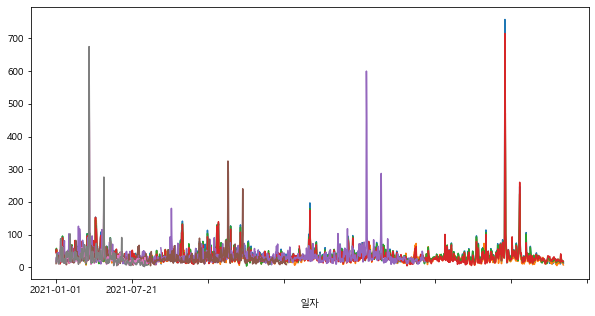

In [87]:
date = pd.date_range("2018-01-01","2021-08-31")
측정소목록 = 미세먼지_결측치대체["측정소명"].value_counts().index

fig,ax = plt.subplots(1,1,figsize=(10,5))
for 측정소 in 측정소목록:
    data = 미세먼지_결측치대체[미세먼지_결측치대체["측정소명"] == 측정소].set_index("일자")
    data["PM10"].plot(ax=ax)